In [60]:
import pandas as pd

In [61]:
df = pd.read_csv('data/jdt-bugs-dataset/eclipse_jdt.csv.gz')

In [62]:
df.head()

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
0,1518,P1,Debug,NaN,Icons needed for actions (1GI5UXW),JGS (8/8/01 5:20:19 PM); \tWe need enabled; disabled & hover icons for the following actions:; \t\tCopyToClipboardActionDelegate; \t\tRelaunchActionDelegate; \t\tTerminateAndRemoveActionDelegate; ; DW (9/24/2001 2:22:48 PM); \tUse the standard copy icon for copy to clipboard (desktop likely exposes it).; ; DW (9/24/2001 2:23:05 PM); \tMade requests for; \t\tRelaunch; \t\tTerminate All; \t\tTerminate & Remove,VERIFIED,FIXED,2.0,2001-10-10 22:14:00 -0400,2001-10-18 11:51:14 -0400
1,1519,P3,Debug,NaN,README: Hit count not reset (1GET20Y),JGS (6/4/01 11:43:47 AM); \tSet a breakpoint in InfiniteLoop with a hit count. When suspended;; \tright click breakpoint in Breakpoints viewer and enable. Hit count; \tstays at previous value. Should it be reset to zero?; ; DW (6/4/01 11:50:23 AM); \tThis should just re-enable the breakpoint with the previous hit-count.; ; DS (6/4/2001 11:50:31 AM); \tTo change a hit count breakpoint into a normal breakpoint; you set its hit count to zero.; \tThis should likely be a readme item.; ; DW (6/4/01 6:33:43 PM); \tMake into a README.; ; DW (6/15/01 9:45:55 AM); \tAdded to README.,RESOLVED,WORKSFORME,2.0,2001-10-10 22:14:00 -0400,2001-11-28 13:42:46 -0500
2,1520,P3,Debug,NaN,Use styled text in console (1G9S1YF),DW (2/26/01 5:56:36 PM); \tCould allow users to use styled text in console; with preference support. This would; \tallow console input to be shown in bold; etc.,CLOSED,WONTFIX,2.0,2001-10-10 22:14:00 -0400,2002-06-26 11:32:05 -0400
3,1521,P3,Debug,NaN,StringBuffer representation (1GE3BFA),JGS (5/21/01 2:09:10 PM); \tTo be consistent; should we represent StringBuffer objects in the variables view like; \twe do Strings; with their values shown on the top node; so the user doesnt have to; \texpand the object and look at the char array?; ; DW (5/21/01 6:33:02 PM); \tDeferred - requires an evaluation.,VERIFIED,FIXED,2.0,2001-10-10 22:14:00 -0400,2002-02-05 10:37:09 -0500
4,1522,P2,Debug,1663.0,Feature: use #toString to display variable values (1G1Y25J),DW (9/27/00 11:12:31 AM); \tCurrently; the type of an object is shown in the variables view for ; its value.; \tOnly Strings and primitive types show concrete values. We should display; \tthe toString() of each object as its value. ; ; DW (10/23/00 11:22:02 AM); \tComments from CM:; ; \tFirst I need to define thread <g> because there are 2 of them:; 1) when I say thread; I mean a Java Thread; i.e. an object of type ; java.lang.Thread; 2) when I say vm thread; I mean the debuggers represenation of a thread in ; the VM;; \ti.e. an object of type com.oti.defrogger.model.DbgThread; ; So; when asked for an objects toString; the debugger creates a new thread; to do the following:; ; - lock the vm thread so that no other thread can invoke toString on that vm ; thread; ; - set a flag on the vm thread: fIsInvokingToString = true; ; - use INVOKE_SINGLE_THREADED to send toString() to the object in the vm thread; ; - set fIsInvokingToString = false; ; - unlock the vm thread; ; ; The fIsInvokingToString flag is checked on a breakpoint; watchpoint; or ; exception;; so that we dont stop on debugger-invoked toStrings.; ; The debugger will stop if the USER runs through a toString method in the ; ordinary; manner (if a breakpoint; watchpoint; or exception is encountered).; ; DS (10/23/2000 4:14:16 PM); \t3 days; ; EG (11/8/00 4:54:47 PM); \tIve worked with toString enabled for some time in VAME. It introduces ; both; \tperformance and run-time behaviour problems. I had to switch it off ; \teventually.; ; DW (12/7/00 5:14:30 PM); \tCreated simple implementation that is not robust. Needs to account for; \tbreakpoints; exceptions ; and timeouts.; ; DW (12/7/00 7:18:38 PM); \tAdded breakpoint support; but did not release implementation into ; plugin file.; ; \tIssue:; \t\tIf an infinite loop is hit; how can

In [63]:
df.columns

Index(['Issue_id', 'Priority', 'Component', 'Duplicated_issue', 'Title',
       'Description', 'Status', 'Resolution', 'Version', 'Created_time',
       'Resolved_time'],
      dtype='object')

In [64]:
df[['Issue_id','Priority','Component','Title','Description']].sample(2)

,Issue_id,Priority,Component,Title,Description
24858,88563,P3,UI,[code manipulation] Offer implicit functions as override/implement options,A class that implements Cloneable may need to implement clone().; ; A class that implements Serializable may need to implement readObject/writeObject.; ; These special methods could usefully be offered as Source->Override/Implement; Methods options.
39012,253762,P3,UI,Extract Class throws NPE.,Build ID: I20081030-1917 (3.5M3); ; Possible duplicate of bug 253727; but different stack trace.; ; Steps To Reproduce:; 1. Please place the caret anywhere on LINE 9.; 2. Try to Extract Class. See crash below in error log.; ; ----------------- Bug.java ----------------; import static org.eclipse.swt.SWT.*;; import org.eclipse.swt.events.*;; import org.eclipse.swt.widgets.*;; class Bug{; ToolItem settings; ; \tBug(){; \t\t(settings=new ToolItem(null;NONE)).addSelectionListener(; \t\t\t\tnew SelectionAdapter(){; \t\t\tint x; // LINE 9; \t\t\t@Override; \t\t\tpublic void widgetSelected(final SelectionEvent e){\t\t; \t\t\t\tnew Dialog(null;NONE){\t\t \t\t; \t\t\t\t\tvoid open(){ ; \t\t\t\t\t}; \t\t\t\t}.open(); ; \t\t\t}});; \t}; }; ; More information:; Caused by: java.lang.NullPointerException; \tat org.eclipse.jdt.internal.corext.refactoring.structure.ExtractClassRefactoring.performFieldRewrite(ExtractClassRefactoring.java:713); \tat org.eclipse.jdt.internal.corext.refactoring.structure.ExtractClassRefactoring.checkFinalConditions(ExtractClassRefactoring.java:359)


In [65]:
df = df.drop(columns=['Duplicated_issue'])

In [66]:
pd.set_option('display.max_colwidth', None)
df.sample(1, random_state=42).T

,38438
Issue_id,239715
Priority,P3
Component,UI
Title,No property tester for TestCaseElement for property projectNature
Description,I20080613-2000; ; Not sure if this belongs to JDT/Debug or Platform/Debug.; ; I saw this error message several times today in my error log but Im not yet sure how to reproduce it.; ; -- Error Details --; Date: Sun Jul 06 16:04:00 CEST 2008; Message: No property tester contributes a property org.eclipse.debug.ui.projectNature to type class org.eclipse.jdt.internal.junit.model.TestCaseElement; Severity: Error; Plugin: org.eclipse.core.expressions
Status,RESOLVED
Resolution,WORKSFORME
Version,3.4
Created_time,2008-07-06 10:07:00 -0400
Resolved_time,2009-04-24 09:09:02 -0400


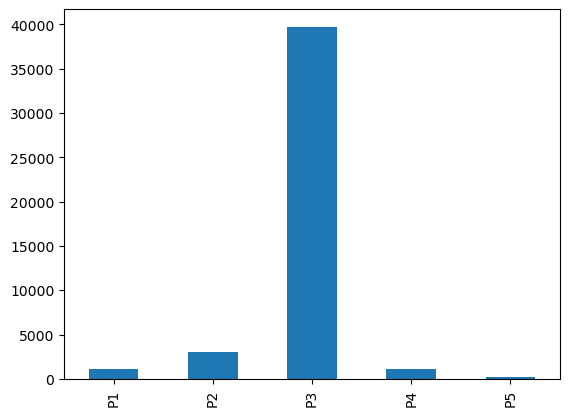

In [67]:
df['Priority'].value_counts().sort_index().plot(kind='bar');

In [68]:
df['Component'].value_counts()

UI       17479
Core     13669
Debug     7542
Text      5901
APT        406
Doc        299
Name: Component, dtype: int64

# Building a Text Classification system

In [69]:
df = df[['Title', 'Description', 'Priority', 'Component']]
df = df.dropna()

In [70]:
# combine title and description columns
df['text'] = df['Title'] + ' ' + df['Description']
df = df.drop(columns=['Title','Description'])
df.columns

Index(['Priority', 'Component', 'text'], dtype='object')

In [71]:
import html
import re

def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text) 
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [82]:
df.sample(2, random_state=20)

,Priority,Component,text
19271,P3,Core,[1.5] Missing receiver in parameterized message send Cheetah04; ; When parsing the following program; the receiver of parameterized message send ; is incorrectly considered as being an implicit one; where it should be name ; ref X.; X.<String;X>foo(SUCCESS; null); ; Testcase:; ; public class X {; ; \tstatic <T; U> T foo(T t; U u) {; \t\treturn t;; \t}; \tpublic static void main(String[] args) {; \t\tSystem.out.println(X.<String;X>foo(SUCCESS; null));; \t}; }
30203,P3,UI,[create script] Select All doesnt work 20060131; - Create script; - Press Select All; nothing happens


In [85]:
df['text'] = df['text'].map(clean)
df = df[df['text'].str.len() > 50]

In [96]:
df.loc[19271]

Priority                                                                                                                                                                                                                                                                                                                                                                                                                              P3
Component                                                                                                                                                                                                                                                                                                                                                                                                                           Core
text         Missing receiver in parameterized message send Cheetah04; ; When parsing the following program; the receiver of parameterized message sen

# Split data into Train and Test sets

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Priority'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36040
Size of Test Data  9011


# Train the model

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
tfidf = TfidfVectorizer(min_df=10, ngram_range=(1,2), stop_words='english')

## Convert train text data into tfidf feature vectors

In [102]:
X_train_tf = tfidf.fit_transform(X_train)

In [105]:
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

LinearSVC(random_state=0, tol=1e-05)

# Evaluate the model

In [106]:
# Transform test data to tfidf vectors
X_test_tf = tfidf.transform(X_test)

In [107]:
Y_pred = model1.predict(X_test_tf)

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [110]:
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))

Accuracy Score -  0.8759294195982688


In [112]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=42) # Always predicts the most frequent label

In [113]:
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score -  0.8769281988680502


## Precision and Recall

In [119]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[  20,    1,  198,    4,    0],
       [   6,   18,  576,    8,    0],
       [   8,   51, 7824,   19,    0],
       [   0,    5,  192,   31,    0],
       [   0,    0,   50,    0,    0]])

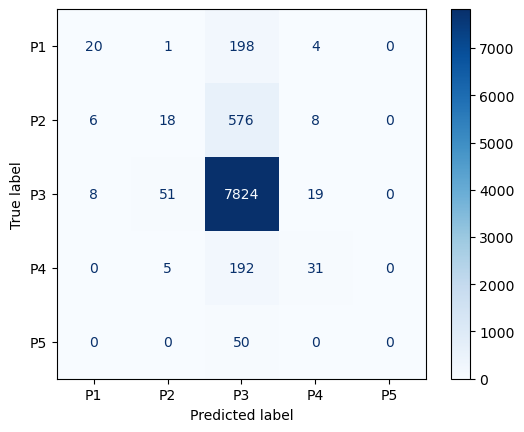

In [166]:
ConfusionMatrixDisplay(cm, display_labels=model1.classes_).plot(cmap=plt.cm.Blues);

In [170]:
# import matplotlib.pyplot as plt
# ConfusionMatrixDisplay.from_estimator(model1, X_test_tf, Y_test, cmap=plt.cm.Blues);
# ConfusionMatrixDisplay.from_estimator(clf, X_test_tf, Y_test, cmap=plt.cm.Blues);

In [178]:
print(classification_report(Y_test, Y_pred, zero_division=0))

              precision    recall  f1-score   support

          P1       0.59      0.09      0.16       223
          P2       0.24      0.03      0.05       608
          P3       0.89      0.99      0.93      7902
          P4       0.50      0.14      0.21       228
          P5       0.00      0.00      0.00        50

    accuracy                           0.88      9011
   macro avg       0.44      0.25      0.27      9011
weighted avg       0.82      0.88      0.83      9011



# Handle  Class Imbalance

In [182]:
df['Priority'].value_counts()

P3    39506
P2     3038
P4     1138
P1     1117
P5      252
Name: Priority, dtype: int64

## Undersampling

In [184]:
# Filter bug reports with priority P3 and sample 4000 rows from it
df_sampleP3 = df[df['Priority'] == 'P3'].sample(n=4000, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['Priority'] != 'P3']

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['Priority'].value_counts()

P3    4000
P2    3038
P4    1138
P1    1117
P5     252
Name: Priority, dtype: int64

In [187]:
# Load balanced dataset
df = df_balanced[['text', 'Priority', 'Component']]

# split train, test data
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Priority'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

# Train the model
tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

# Evaluate the model
X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)

print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Size of Training Data  7636
Size of Test Data  1909
Accuracy Score -  0.5034049240440021
              precision    recall  f1-score   support

          P1       0.44      0.29      0.35       223
          P2       0.45      0.48      0.46       608
          P3       0.56      0.66      0.61       800
          P4       0.47      0.34      0.39       228
          P5       0.00      0.00      0.00        50

    accuracy                           0.50      1909
   macro avg       0.38      0.35      0.36      1909
weighted avg       0.49      0.50      0.49      1909



# Cross-Validation

In [189]:
from sklearn.model_selection import cross_val_score

# Vectorization

tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
df_tf = tfidf.fit_transform(df['text']).toarray()

# Cross Validation with 5 folds

scores = cross_val_score(estimator=model1,
                         X=df_tf,
                         y=df['Priority'],
                         cv=5)

print ("Validation scores from each iteration of the cross validation ", scores)
print ("Mean value across of validation scores ", scores.mean())
print ("Standard deviation of validation scores ", scores.std())

Validation scores from each iteration of the cross validation  [0.48245155 0.45259298 0.44002095 0.42221058 0.37297014]
Mean value across of validation scores  0.43404924044002097
Standard deviation of validation scores  0.03631287637702657


# Hyperparameter Tuning with Grid Search

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [191]:
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), 
           ('model', LinearSVC(random_state=21, tol=1e-5))])

grid_param = [{
    'tfidf__min_df': [5, 10],
    'tfidf__ngram_range': [(1, 3), (1, 6)],
    'model__penalty': ['l2'],
    'model__loss': ['hinge'],
    'model__max_iter': [10000]
}, {
    'tfidf__min_df': [5, 10],
    'tfidf__ngram_range': [(1, 3), (1, 6)],
    'model__C': [1, 10],
    'model__tol': [1e-2, 1e-3]
}]

gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(df['text'], df['Priority'])

best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

Best alpha parameter identified by grid search  {'model__loss': 'hinge', 'model__max_iter': 10000, 'model__penalty': 'l2', 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 3)}
Best result identified by grid search  0.46034573074908325


In [192]:
gridsearch_results = pd.DataFrame(gridSearchProcessor.cv_results_)
gridsearch_results[['rank_test_score', 'mean_test_score', 'params']].sort_values(by=['rank_test_score'])[:5]

,rank_test_score,mean_test_score,params
2,1,0.460346,"{'model__loss': 'hinge', 'model__max_iter': 10000, 'model__penalty': 'l2', 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 3)}"
0,2,0.459298,"{'model__loss': 'hinge', 'model__max_iter': 10000, 'model__penalty': 'l2', 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 3)}"
1,3,0.457831,"{'model__loss': 'hinge', 'model__max_iter': 10000, 'model__penalty': 'l2', 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 6)}"
3,4,0.456888,"{'model__loss': 'hinge', 'model__max_iter': 10000, 'model__penalty': 'l2', 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 6)}"
4,5,0.439497,"{'model__C': 1, 'model__tol': 0.01, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 3)}"
